# **CIS 520: Machine Learning, Fall 2020**
# **Week 9, Worksheet 1**
## **K-Means Clustering and Gaussian Mixture Models** 


- **Content Creator:** Kenneth Shinn
- **Content Reviewers:** Hanwen Zhang, Mohit Kumaraian
- **Reference:** 
<ul>
<li>https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
<li>https://medium.com/swlh/gaussian-mixture-models-gmm-1327a2a62a
</ul>


The objective of this notebook is to walk through a working example of K-means clustering algorithm. In doing so, we will see how the algorithm will change from changing hyper-parameters. We can also observe K-means' shortcomings and how more generalized approaches (GMM) may lead to performance benefits.



# **K-Means**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

First, let's create a toy dataset. Because K-means is an unsupervised algorithm, in application, we probably wouldn't know the true y's of the dataset that we're running the algorithm on. 

In [ ]:
X, y = make_blobs(
   n_samples=300, n_features=2,
   centers=3, cluster_std=.5,
   shuffle=True, random_state=0
)

How does this data set look? Let's take a look at the clusters.

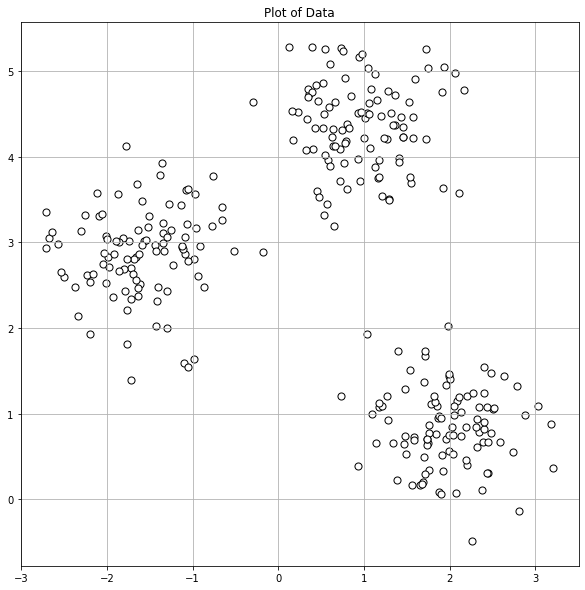

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.title('Plot of Data')
plt.grid()
plt.show()

Can we assume that usual data will look like this? What critical assumption(s) about the data did we make?

In this worksheet, we will use scikit-learn's k-means clustering algorithm as as "black box" implementation. 

In [ ]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 3

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

kmeans = KMeans(
    n_clusters=num_clusters, init='random',
    n_init=n_runs, max_iter=max_iter, 
    tol=1e-04, random_state=0
)

y_pred_km = kmeans.fit_predict(X)

Let's see how the algorithm did by plotting the clusters. What do you expect to be the boundaries of the three clusters? How about the centroids for each cluster?

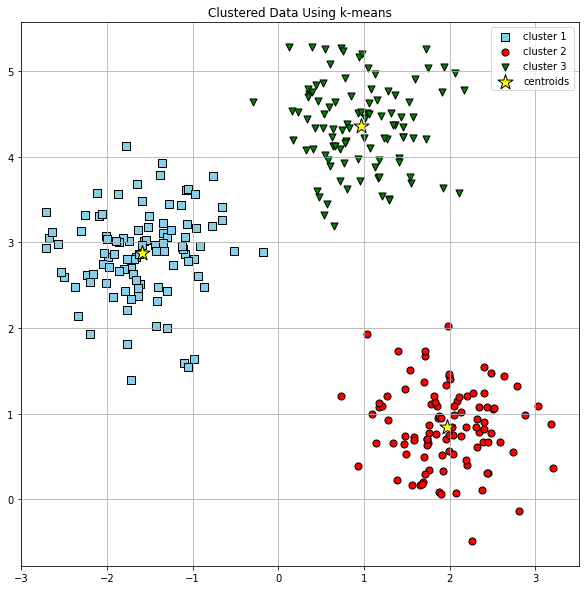

In [ ]:
plt.figure(figsize=(10,10))

# plot cluster 1
plt.scatter(
    X[y_pred_km == 0, 0], X[y_pred_km == 0, 1],
    s=50, c='skyblue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_km == 1, 0], X[y_pred_km == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_km == 2, 0], X[y_pred_km == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

We can measure the performance of the k-means algorithm using the sum of squared distances of samples to their closest cluster center. This is also known as *distortion*. 

In [ ]:
print("distortion = " + str(kmeans.inertia_))

distortion = 147.4690996452979


But does distortion precisely measure the performance of the k-means algorithm? How would our distortion have changed if we used $k=4$, instead of $k=3$? Do you think that the distortion would increase or decrease? 

Let's rerun our code above with $k=4$ and find out. 

In [ ]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 4

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

kmeans = KMeans(
    n_clusters=num_clusters, init='random',
    n_init=n_runs, max_iter=max_iter, 
    tol=1e-04, random_state=0
)

y_pred_km = kmeans.fit_predict(X)

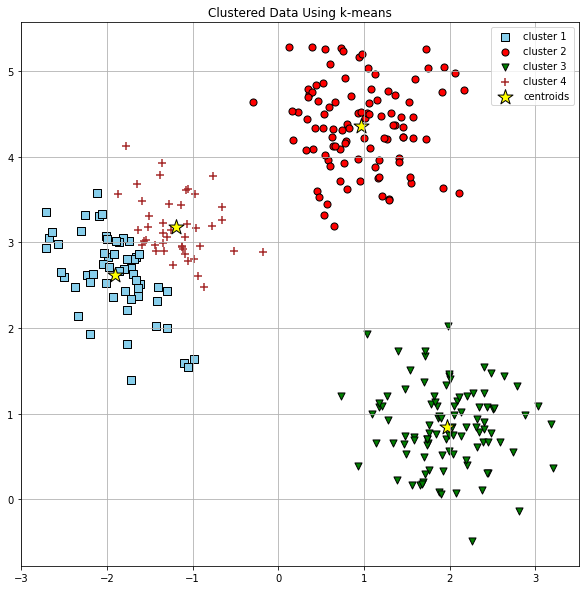

In [ ]:
plt.figure(figsize=(10,10))

# plot cluster 1
plt.scatter(
    X[y_pred_km == 0, 0], X[y_pred_km == 0, 1],
    s=50, c='skyblue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_km == 1, 0], X[y_pred_km == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_km == 2, 0], X[y_pred_km == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot cluster 4
plt.scatter(
    X[y_pred_km == 3, 0], X[y_pred_km == 3, 1],
    s=50, c='brown',
    marker='+', edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
print("distortion = " + str(kmeans.inertia_))

distortion = 126.98313476849792


Does the change in distortion as a result of going from $k=3$ to $k=4$ surprise you? Why or why not? Do you expect distortion to increase or decrease for $k=5$? How about if we go to $k=6$? 

What does this mean about using the distortion as the only metric for choosing the correct hyperparameter $k$? 

How could we use distortion as a way to choose $k$ without running into the problem exhibited above? (hint: think about the change in distortion as a result of change in $k$)

Now, let's remove our assumption of identical variances and see how this algorithm performs. 

In [ ]:
X, y = make_blobs(
   n_samples=300, n_features=2,
   centers=3, cluster_std=[(.25, 1), (.5, .75), (1.5, .5)],
   shuffle=True, random_state=0
)

How does this data set look? Let's take a look at the clusters.

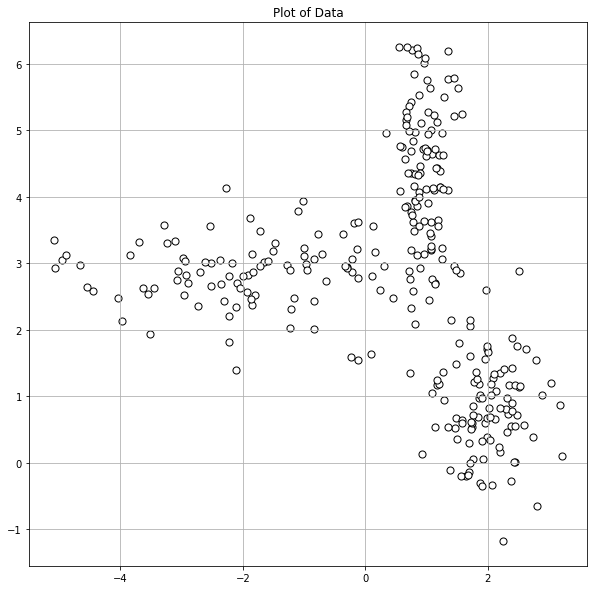

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.title('Plot of Data')
plt.grid()
plt.show()

Again, let's run the k-means algorithm...

In [ ]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 3

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

kmeans = KMeans(
    n_clusters=num_clusters, init='random',
    n_init=n_runs, max_iter=max_iter, 
    tol=1e-04, random_state=0
)

y_pred_km = kmeans.fit_predict(X)

...and plot the clusters

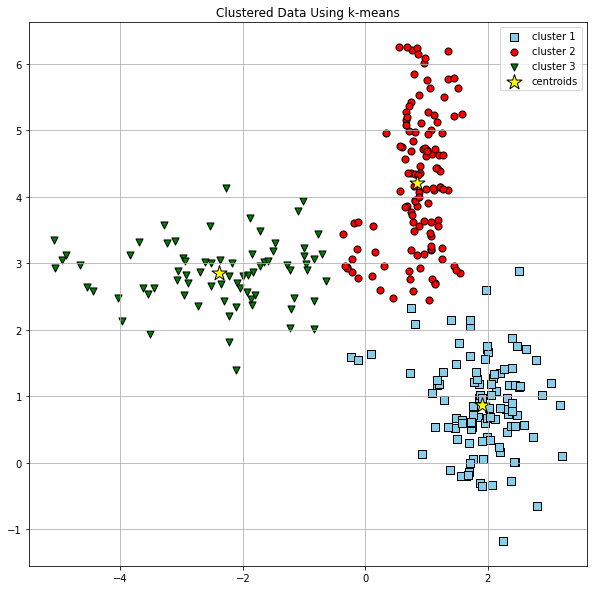

In [ ]:
plt.figure(figsize=(10,10))

# plot cluster 1
plt.scatter(
    X[y_pred_km == 0, 0], X[y_pred_km == 0, 1],
    s=50, c='skyblue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_km == 1, 0], X[y_pred_km == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_km == 2, 0], X[y_pred_km == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Not bad, but clearly the k-means's assumption that the variances are equal (and as a result, creating spherical boundaries) seems to be negatively impacting the clustering. One cluster seems to be eating into the boundary of another. 

To adjust for theses differences in variances, it will be necessary to remove this assumption. This paves the way for Guassian Mixture Models!

# **Gaussian Mixture Models**

With GMM, we allow the samples to have different probabilities from being in different clusters $p(z_i = k)$, allow different probabilities of drawing from different clusters $\pi_k$, and allow the estimation of the entire covariance matrix $\Sigma_k$. 

As stated in lecture, the goal is to estimate the parameters of the mixture $(\pi_k, \mu_k, \Sigma_k)$ for all $k = 1, ...,K$, using maximum liklihood estimation (or MAP). 

$$\log P(D \mid \pi,\mu,\Sigma) = \sum_i \log \sum_k p_\pi(z_i=k) p_{\mu,\Sigma}(\mathbf{x}_i\mid z_i=k)$$

In [ ]:
# The number of clusters to form as well as the number of centroids to generate.
num_clusters = 3

# Maximum number of iterations of the k-means algorithm for a single run.
max_iter = 300

#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
n_runs = 10

GMM = GaussianMixture(
    n_components=num_clusters,
    n_init=n_runs, max_iter=max_iter, 
    tol=1e-04, random_state=0
)

y_pred_gmm = GMM.fit_predict(X)

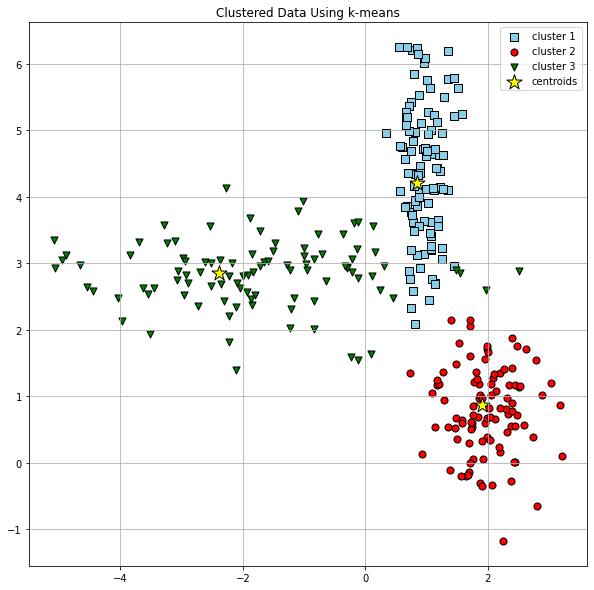

In [ ]:
plt.figure(figsize=(10,10))

# plot cluster 1
plt.scatter(
    X[y_pred_gmm == 0, 0], X[y_pred_gmm == 0, 1],
    s=50, c='skyblue',
    marker='s', edgecolor='black',
    label='cluster 1'
)

# plot cluster 2
plt.scatter(
    X[y_pred_gmm == 1, 0], X[y_pred_gmm == 1, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot cluster 3
plt.scatter(
    X[y_pred_gmm == 2, 0], X[y_pred_gmm == 2, 1],
    s=50, c='green',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroids'
)
plt.title('Clustered Data Using k-means')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Looks a lot better! What are some observations that we can make from comparing the clustering result from k-means to the clustering result from GMM? Think about this for a little bit before reading on.


...


Okay, here are some observations. 


*   The cluster in the upper right makes a lot more sense than when we ran this data set with k-means. GMM is able to figure out that the cluster really comes from a source with a larger y-variance and a smaller x-variance. As such, it is no longer "eating" into the data points presumably from the left cluster. 
*   There are data points that are above the bottom right cluster and to the right of the upper right cluster that are classified with the left cluster (the green points). Can you think about why GMM did this?

**Experiment:** 

Take a second a change around the clusters' variances in the second cell of this worksheet. Before running the clustering code above, see if you can predict how each of the algorithms (k-means, GMM) will cluster the data - this will help build intuition of how the algorithms are similar and different. 